In [1]:
import pandas as pd
import geopandas
import fiona
from matplotlib import pyplot as plt

In [2]:
indicator_data=pd.read_csv("indicator_data.csv",encoding="latin_1")
processed_data=pd.read_csv("processed_data.csv",encoding="latin_1")

C:\Users\chenl\AppData\Local\Temp\ipykernel_4020\2365895264.py:2: DtypeWarning: Columns (13,17,19,20,21,26,29,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,120,123,125,127,128,129,131,132,133,134,135,136,137,141,142,143,144,145,146,147,150,151,152,153,154,155,157,158,159,160,162,163,164,165,166,167,168,169,170,171,172,173,174,177,179,180,181,182,183,184,185,186,188,189,190,191,192,204,205,208,209,210,211,212,213,214,215,216,219,220,222,230,232,240,242,250,257,258,259,260,261,262,263,264,265,266,269,270,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) #load the world data

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))#load the city data

## Find the highest households

In [4]:
indicator_data #see the indicator_data

,id_unique,id_hh,id_rhomis_dataset,id_form,id_proj,iso_country_code,year,currency_conversion_lcu_to_ppp,currency_conversion_factor_year,survey_length_minutes,...,value_livestock_products_consumed_lcu_per_hh_per_year,value_farm_products_consumed_lcu_per_hh_per_year,crop_consumed_calories_kcal_per_hh_per_year,farm_products_consumed_calories_kcal_per_hh_per_year,staple_crop,staple_crop_kcal_per_lcu,proportion_of_value_controlled_female_youth,proportion_of_value_controlled_female_adult,proportion_of_value_controlled_male_youth,proportion_of_value_controlled_male_adult
0,8444615bd07f6dec05d2f5711089fc70,5de2a460989689c65cddcc11dcd6d669,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,BF,2019.0,188.940792,2019.0,NaN,...,0.00,48125.000000,1134000.0,1134000.00,maize,125.142857,0.0,0.376074,0.0,0.623926
1,91aaf7946aefd6cb81a79ea708e1c1dd,68c38ad18121a7479d44e2e307f59301,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,BF,2019.0,188.940792,2019.0,NaN,...,0.00,154145.833333,6743100.0,6743100.00,maize,125.142857,0.0,0.487353,0.0,0.512647
2,01c313e52310dc15400109b77b1e1606,deb7612f4c786529f7ca7c5b9b294e92,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,BF,2019.0,188.940792,2019.0,NaN,...,0.00,2041.666667,255500.0,255500.00,maize,125.142857,0.0,0.000000,0.0,1.000000
3,79116ad9883cfa915229b5b550326a87,c4b4d405b53602e4a7357802b09b469c,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,BF,2019.0,188.940792,2019.0,NaN,...,0.00,0.000000,1008000.0,1008000.00,maize,125.142857,0.0,0.740385,0.0,0.259615
4,6667ba121fb42364eeb684c142ac1575,2c10d5cdc6d5c2b48c415f71d04ff00e,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,BF,2019.0,188.940792,2019.0,NaN,...,0.00,48270.833333,2618800.0,2618800.00,maize,125.142857,0.0,0.176519,0.0,0.823481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35708,3fafdf0bf5a7d97ea05fe4a7392df1e0,fbd18a0500dabc88e95f99c9c473d7e2,d94bd7e89f59c72c3ee9d0a0a8337abc,zm_scn_2017,scn,NaN,2017.0,NaN,NaN,NaN,...,230.64,497466.631116,20223000.0,20223230.64,maize,36.890935,0.0,0.489063,0.0,0.510937
35709,4cb2950ee6d78aaf919f74bffc2d02a5,9813a2be08ff840716586af8f7d05443,d94bd7e89f59c72c3ee9d0a0a8337abc,zm_scn_2017,scn,NaN,2017.0,NaN,NaN,NaN,...,0.00,312265.613935,13185375.0,13185375.00,maize,36.890935,0.0,0.474418,0.0,0.525582
35710,11b57c9cea186ebc3c844b4a4d499265,ae0142f8bb74738d9286febd33c071c1,d94bd7e89f59c72c3ee9d0a0a8337abc,zm_scn_2017,scn,NaN,2017.0,NaN,NaN,NaN,...,0.00,38356.548611,1803650.0,1803650.00,maize,36.890935,0.0,0.437576,0.0,0.562424
35711,fc0b480a22d2a2bbc68f32e4cf329111,85faddf5bdc65677ebfe71254c22c580,d94bd7e89f59c72c3ee9d0a0a8337abc,zm_scn_2017,scn,NaN,2017.0,NaN,NaN,NaN,...,0.00,259718.275068,9581250.0,9581250.00,maize,36.890935,0.0,0.500000,0.0,0.500000


In [5]:
ISO_Country=indicator_data['iso_country_code'].value_counts() # the total counts of households in each country in the indicator data

### add a bar chart here

<AxesSubplot:>

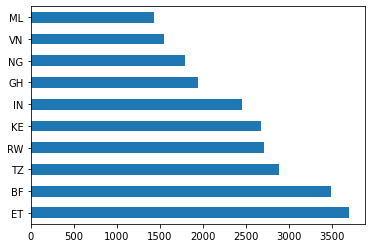

In [6]:
import matplotlib.pyplot as plt
ISO_Country[:10].plot(kind='barh')

In [7]:
indicator_processed=pd.DataFrame(indicator_data,columns=["hfias_status"]) #this is the column that we are going to use

In [8]:
processed_data['id_country'].value_counts()# the total counts of households in each country in the processed data

et    3701
bf    3484
tz    2880
rw    2713
ke    2677
in    2455
gh    1944
ng    1791
vn    1553
ml    1428
cd    1376
zm    1193
ug    1189
bi     834
ne     722
kh     712
mw     628
sl     470
ci     422
la     415
gt     380
ec     284
km     283
ps     248
ma     221
ni     220
cr     204
pe     171
sn     165
bo     134
za     132
hn      59
sv      51
Name: id_country, dtype: int64

In [9]:
processed_data #see the processed data

,id_unique,id_hh,id_rhomis_dataset,id_form,id_proj,id_country,year,iteration,survey_id,rhomis_id,...,female_adult_meat_sold_kg_per_year_5,female_youth_meat_sold_kg_per_year_5,male_adult_meat_sold_income_5,male_youth_meat_sold_income_5,female_adult_meat_sold_income_5,female_youth_meat_sold_income_5,eggs_sold_price_timeunits_other_4,eggs_sold_price_timeunits_other_5,offfarm_year_round_5,offfarm_year_round_6
0,8444615bd07f6dec05d2f5711089fc70,5de2a460989689c65cddcc11dcd6d669,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,bf,2019.0,1.0,bf_adn_2019,8444615bd07f6dec05d2f5711089fc70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91aaf7946aefd6cb81a79ea708e1c1dd,68c38ad18121a7479d44e2e307f59301,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,bf,2019.0,1.0,bf_adn_2019,91aaf7946aefd6cb81a79ea708e1c1dd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01c313e52310dc15400109b77b1e1606,deb7612f4c786529f7ca7c5b9b294e92,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,bf,2019.0,1.0,bf_adn_2019,01c313e52310dc15400109b77b1e1606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79116ad9883cfa915229b5b550326a87,c4b4d405b53602e4a7357802b09b469c,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,bf,2019.0,1.0,bf_adn_2019,79116ad9883cfa915229b5b550326a87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6667ba121fb42364eeb684c142ac1575,2c10d5cdc6d5c2b48c415f71d04ff00e,965a6c0a72bf4bf0079b305ee61661e4,bf_adn_2019,adn,bf,2019.0,1.0,bf_adn_2019,6667ba121fb42364eeb684c142ac1575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35708,3fafdf0bf5a7d97ea05fe4a7392df1e0,fbd18a0500dabc88e95f99c9c473d7e2,d94bd7e89f59c72c3ee9d0a0a8337abc,zm_scn_2017,scn,zm,2017.0,1.0,zm_scn_2017,3fafdf0bf5a7d97ea05fe4a7392df1e0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35709,4cb2950ee6d78aaf919f74bffc2d02a5,9813a2be08ff840716586af8f7d05443,d94bd7e89f59c72c3ee9d0a0a8337abc,zm_scn_2017,scn,zm,2017.0,1.0,zm_scn_2017,4cb2950ee6d78aaf919f74bffc2d02a5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35710,11b57c9cea186ebc3c844b4a4d499265,ae0142f8bb74738d9286febd33c071c1,d94bd7e89f59c72c3ee9d0a0a8337abc,zm_scn_2017,scn,zm,2017.0,1.0,zm_scn_2017,11b57c9cea186ebc3c844b4a4d499265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35711,fc0b480a22d2a2bbc68f32e4cf329111,85faddf5bdc65677ebfe71254c22c580,d94bd7e89f59c72c3ee9d0a0a8337abc,zm_scn_2017,scn,zm,2017.0,1.0,zm_scn_2017,fc0b480a22d2a2bbc68f32e4cf329111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
processed__data=pd.DataFrame(processed_data,columns=["id_unique","id_rhomis_dataset","id_country","gps_lat","gps_lon","gps_alt","country","sublocation"])
#select the using data columns in processed_data

In [11]:
food_safety = pd.concat([processed__data,indicator_processed], axis=1)#combine these two data together

In [12]:
food_safety# check the data

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status
0,8444615bd07f6dec05d2f5711089fc70,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.95,254.00,burkina_faso,NaN,food_secure
1,91aaf7946aefd6cb81a79ea708e1c1dd,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.95,346.00,burkina_faso,NaN,food_secure
2,01c313e52310dc15400109b77b1e1606,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.99,324.00,burkina_faso,NaN,food_secure
3,79116ad9883cfa915229b5b550326a87,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.99,326.00,burkina_faso,NaN,food_secure
4,6667ba121fb42364eeb684c142ac1575,965a6c0a72bf4bf0079b305ee61661e4,bf,11.22,-1.02,308.00,burkina_faso,NaN,food_secure
...,...,...,...,...,...,...,...,...,...
35708,3fafdf0bf5a7d97ea05fe4a7392df1e0,d94bd7e89f59c72c3ee9d0a0a8337abc,zm,-13.82,32.67,1119.60,zambia,NaN,food_secure
35709,4cb2950ee6d78aaf919f74bffc2d02a5,d94bd7e89f59c72c3ee9d0a0a8337abc,zm,-13.82,32.67,1128.85,zambia,NaN,food_secure
35710,11b57c9cea186ebc3c844b4a4d499265,d94bd7e89f59c72c3ee9d0a0a8337abc,zm,-13.82,32.67,1132.41,zambia,NaN,food_secure
35711,fc0b480a22d2a2bbc68f32e4cf329111,d94bd7e89f59c72c3ee9d0a0a8337abc,zm,-13.82,32.67,1136.24,zambia,NaN,food_secure


## Split dataset

In [13]:
food_safety_bf=food_safety.loc[food_safety['id_country'] == 'bf']#select the Burkina_faso from the data

In [14]:
food_safety_bf #hfias_status in Burkina_faso

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status
0,8444615bd07f6dec05d2f5711089fc70,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.95,254.0,burkina_faso,NaN,food_secure
1,91aaf7946aefd6cb81a79ea708e1c1dd,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.95,346.0,burkina_faso,NaN,food_secure
2,01c313e52310dc15400109b77b1e1606,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.99,324.0,burkina_faso,NaN,food_secure
3,79116ad9883cfa915229b5b550326a87,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.99,326.0,burkina_faso,NaN,food_secure
4,6667ba121fb42364eeb684c142ac1575,965a6c0a72bf4bf0079b305ee61661e4,bf,11.22,-1.02,308.0,burkina_faso,NaN,food_secure
...,...,...,...,...,...,...,...,...,...
3479,08574664553edb745dd998b97e59eac3,38808e15227aeb2984a389744573a85d,bf,12.20,-1.40,304.0,burkina_faso,koubri,food_secure
3480,62bbc31489a8a9fd9fb9895dfa5277e5,38808e15227aeb2984a389744573a85d,bf,12.20,-1.40,312.0,burkina_faso,koubri,food_secure
3481,78acabd7fc9455eb47300f97974df506,38808e15227aeb2984a389744573a85d,bf,12.20,-1.40,327.0,burkina_faso,koubri,food_secure
3482,10656d6baefba3dd791128380514a0d5,38808e15227aeb2984a389744573a85d,bf,12.20,-1.40,312.0,burkina_faso,koubri,food_secure


In [21]:
food_safety_bf_count=food_safety_bf['hfias_status'].value_counts() # the rankings of total hfias_status in burkina_faso 

<AxesSubplot:>

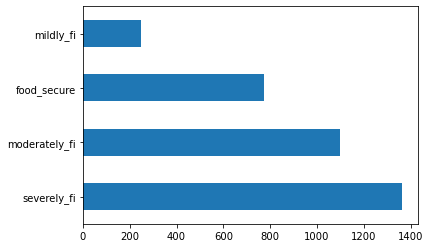

In [22]:
food_safety_bf_count.plot(kind='barh')#plot the rankings

In [15]:
food_safety_et=food_safety.loc[food_safety['id_country'] == 'et'] #select the Ethiopia from the data

In [16]:
food_safety_et #hfias_status in Ethiopia

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status
6738,9345a2d00f83a138328ecc6a2463c43e,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3089.0,ethiopia,basona_worena,food_secure
6739,f45014cd953c25242295b6a46d16184b,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3080.0,ethiopia,basona_worena,food_secure
6740,747a557c8fd2904d20958b2d092d94af,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3091.0,ethiopia,basona_worena,food_secure
6741,3168b2279ce7bb17da1fd6cafaa1cbc0,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3070.0,ethiopia,basona_worena,food_secure
6742,48a090afc81a40a82ca728c98e42d23b,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3079.0,ethiopia,basona_worena,food_secure
...,...,...,...,...,...,...,...,...,...
10434,95dd831eca7cd8a7d1925568d476893c,eaf70b296ca0f9b4c94846d4892219fb,et,8.08,38.75,1655.0,ethiopia,dugda,food_secure
10435,bbcfb401223520466eaa1ef4336a26ad,eaf70b296ca0f9b4c94846d4892219fb,et,8.09,38.71,1704.0,ethiopia,dugda,food_secure
10436,41da8b754dd1e7f853c13b0a7513d6d9,eaf70b296ca0f9b4c94846d4892219fb,et,8.09,38.71,1703.0,ethiopia,dugda,food_secure
10437,1b86a92382141a9f117fcdd2ecbf6de9,eaf70b296ca0f9b4c94846d4892219fb,et,8.10,38.72,1710.0,ethiopia,dugda,food_secure


In [23]:
food_safety_et_count=food_safety_et['hfias_status'].value_counts() # the rankings of total hfias_status in ethiopia

<AxesSubplot:>

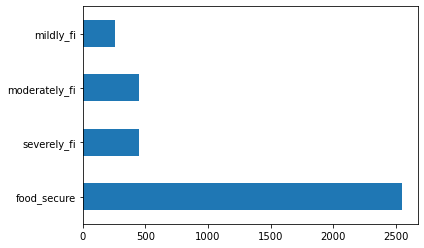

In [24]:
food_safety_et_count.plot(kind='barh')#plot the rankings

In [17]:
food_safety_tz=food_safety.loc[food_safety['id_country'] == 'tz']#select the Tanzania from the data

In [18]:
food_safety_tz #hfias_status in Tanzania

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status
28766,59b6a1a09c5ea3b4278771bf825183d5,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,food_secure
28767,e615530ef1dc3c32cdfcab261c2bb49a,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,food_secure
28768,95833631f148fce365b77cc55ded6fde,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,food_secure
28769,525162fd746a6f680dcc869f11a9f5d9,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,food_secure
28770,1b565a0ff731980dea41897852dd3a3f,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,severely_fi
...,...,...,...,...,...,...,...,...,...
31641,beaea72d2b4074cff739d435f30f3002,fc94ed21eeea955cde1cc0375b8cce27,tz,-10.86,39.59,262.39,tanzania,NaN,food_secure
31642,f725426fdcc21bf54e319880e021c022,fc94ed21eeea955cde1cc0375b8cce27,tz,-10.81,39.66,270.92,tanzania,NaN,severely_fi
31643,53de2bb81da1c2547bc08cfa27f16494,fc94ed21eeea955cde1cc0375b8cce27,tz,-10.81,39.66,275.28,tanzania,NaN,severely_fi
31644,1800b7494547f298088e0a552d0cab95,fc94ed21eeea955cde1cc0375b8cce27,tz,-10.75,39.77,231.78,tanzania,NaN,severely_fi


In [25]:
food_safety_tz_count=food_safety_tz['hfias_status'].value_counts() # the rankings of total hfias_status in tanzania

<AxesSubplot:>

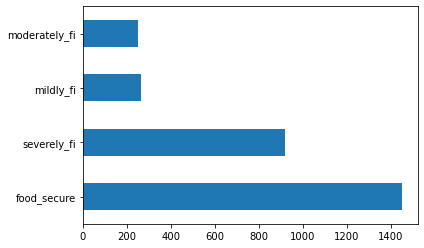

In [26]:
food_safety_tz_count.plot(kind='barh')#plot the rankings

In [19]:
food_safety_rw=food_safety.loc[food_safety['id_country'] == 'rw'] #select the Rwanda from the data

In [20]:
food_safety_rw #hfias_status in Rwanda

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status
25367,030dc9cea022a68a99325de57db72200,3f62a7727897254b3c0089c560656740,rw,-1.94,29.63,2084.01,rwanda,gatumba,food_secure
25368,58069ca9fa5ee2ff12fc76b8b193c282,3f62a7727897254b3c0089c560656740,rw,-1.96,29.66,NaN,rwanda,gatumba,food_secure
25369,a7f4981e60339fb541b8a2a21c715bdb,3f62a7727897254b3c0089c560656740,rw,-1.98,29.61,1779.49,rwanda,ndaro,food_secure
25370,738bd70bfa8e5fc21befcdf2a3abc8fc,3f62a7727897254b3c0089c560656740,rw,-1.94,29.57,3040.44,rwanda,bwira,food_secure
25371,83191b87ab24f0cdfacdc5353c940d37,3f62a7727897254b3c0089c560656740,rw,-1.93,29.63,1660.84,rwanda,gatumba,food_secure
...,...,...,...,...,...,...,...,...,...
28075,b6aaafbc3d3f7db431a9587589341710,3f62a7727897254b3c0089c560656740,rw,-2.55,29.69,1797.90,rwanda,huye,food_secure
28076,746b2aad11e3f04f2929a1a6cf2ad9e2,3f62a7727897254b3c0089c560656740,rw,-2.52,29.75,1726.00,rwanda,ruhashya,food_secure
28077,648cf382cef38b24f7f6a0ab43157e31,3f62a7727897254b3c0089c560656740,rw,-2.56,29.73,1759.90,rwanda,mbazi,food_secure
28078,08dca76fc8a51808ada0bccee805bc8c,3f62a7727897254b3c0089c560656740,rw,-2.56,29.73,1751.40,rwanda,NaN,food_secure


In [27]:
food_safety_rw_count=food_safety_rw['hfias_status'].value_counts() # the rankings of total hfias_status in rwanda

<AxesSubplot:>

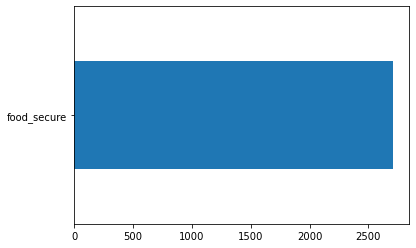

In [28]:
food_safety_rw_count.plot(kind='barh')#plot the rankings

## Plot the data on the map

### Burkina_faso

In [35]:
gdf_bf = geopandas.GeoDataFrame( #set a new dataframe for plotting data of Burkina_faso
    food_safety_bf, geometry=geopandas.points_from_xy(food_safety_bf.gps_lon, food_safety_bf.gps_lat))

In [36]:
gdf_bf.head()#check the data of Burkina_faso

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status,geometry
0,8444615bd07f6dec05d2f5711089fc70,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.95,254.0,burkina_faso,NaN,food_secure,POINT (-0.95000 11.19000)
1,91aaf7946aefd6cb81a79ea708e1c1dd,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.95,346.0,burkina_faso,NaN,food_secure,POINT (-0.95000 11.19000)
2,01c313e52310dc15400109b77b1e1606,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.99,324.0,burkina_faso,NaN,food_secure,POINT (-0.99000 11.19000)
3,79116ad9883cfa915229b5b550326a87,965a6c0a72bf4bf0079b305ee61661e4,bf,11.19,-0.99,326.0,burkina_faso,NaN,food_secure,POINT (-0.99000 11.19000)
4,6667ba121fb42364eeb684c142ac1575,965a6c0a72bf4bf0079b305ee61661e4,bf,11.22,-1.02,308.0,burkina_faso,NaN,food_secure,POINT (-1.02000 11.22000)


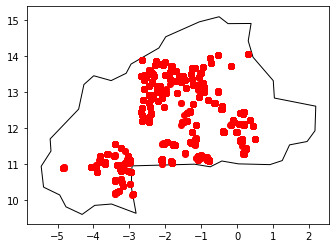

In [38]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) #get the world map file
ax = world[world.iso_a3=="BFA"].plot(
    color='white', edgecolor='black') #plot the location of households in burkina_faso

# We can now plot our ``Geo_bf DataFrame``.
gdf_bf.plot(ax=ax, color='red')

plt.show()

### The data points are shown in different parts of the map, and consist of different kind of condition of food security, the data can be used.

### Ethiopia

In [32]:
gdf_et = geopandas.GeoDataFrame(#set a new dataframe for plotting data of Ethiopia
    food_safety_et, geometry=geopandas.points_from_xy(food_safety_et.gps_lon, food_safety_et.gps_lat))

In [40]:
gdf_et #check the data of Ethiopia

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status,geometry
6738,9345a2d00f83a138328ecc6a2463c43e,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3089.0,ethiopia,basona_worena,food_secure,POINT (39.68000 9.80000)
6739,f45014cd953c25242295b6a46d16184b,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3080.0,ethiopia,basona_worena,food_secure,POINT (39.68000 9.80000)
6740,747a557c8fd2904d20958b2d092d94af,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3091.0,ethiopia,basona_worena,food_secure,POINT (39.68000 9.80000)
6741,3168b2279ce7bb17da1fd6cafaa1cbc0,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3070.0,ethiopia,basona_worena,food_secure,POINT (39.68000 9.80000)
6742,48a090afc81a40a82ca728c98e42d23b,b85a8922f3545a4837a2f028b86ad722,et,9.80,39.68,3079.0,ethiopia,basona_worena,food_secure,POINT (39.68000 9.80000)
...,...,...,...,...,...,...,...,...,...,...
10434,95dd831eca7cd8a7d1925568d476893c,eaf70b296ca0f9b4c94846d4892219fb,et,8.08,38.75,1655.0,ethiopia,dugda,food_secure,POINT (38.75000 8.08000)
10435,bbcfb401223520466eaa1ef4336a26ad,eaf70b296ca0f9b4c94846d4892219fb,et,8.09,38.71,1704.0,ethiopia,dugda,food_secure,POINT (38.71000 8.09000)
10436,41da8b754dd1e7f853c13b0a7513d6d9,eaf70b296ca0f9b4c94846d4892219fb,et,8.09,38.71,1703.0,ethiopia,dugda,food_secure,POINT (38.71000 8.09000)
10437,1b86a92382141a9f117fcdd2ecbf6de9,eaf70b296ca0f9b4c94846d4892219fb,et,8.10,38.72,1710.0,ethiopia,dugda,food_secure,POINT (38.72000 8.10000)


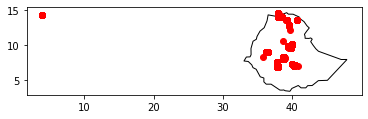

In [34]:
ax = world[world.iso_a3=="ETH"].plot(
    color='white', edgecolor='black')#plot the location of households in Ethiopia

# We can now plot our ``Geo_et DataFrame``.
gdf_et.plot(ax=ax, color='red')

plt.show()

### There is a household point out of the map and other points are shwon on the map and it has different kind of food security. The data can be used.

### Rwanda

In [41]:
gdf_rw = geopandas.GeoDataFrame( #set a new dataframe for plotting data of Rwanda
    food_safety_rw, geometry=geopandas.points_from_xy(food_safety_rw.gps_lon, food_safety_rw.gps_lat))

In [43]:
gdf_rw #check the data of Rwanda

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status,geometry
25367,030dc9cea022a68a99325de57db72200,3f62a7727897254b3c0089c560656740,rw,-1.94,29.63,2084.01,rwanda,gatumba,food_secure,POINT (29.63000 -1.94000)
25368,58069ca9fa5ee2ff12fc76b8b193c282,3f62a7727897254b3c0089c560656740,rw,-1.96,29.66,NaN,rwanda,gatumba,food_secure,POINT (29.66000 -1.96000)
25369,a7f4981e60339fb541b8a2a21c715bdb,3f62a7727897254b3c0089c560656740,rw,-1.98,29.61,1779.49,rwanda,ndaro,food_secure,POINT (29.61000 -1.98000)
25370,738bd70bfa8e5fc21befcdf2a3abc8fc,3f62a7727897254b3c0089c560656740,rw,-1.94,29.57,3040.44,rwanda,bwira,food_secure,POINT (29.57000 -1.94000)
25371,83191b87ab24f0cdfacdc5353c940d37,3f62a7727897254b3c0089c560656740,rw,-1.93,29.63,1660.84,rwanda,gatumba,food_secure,POINT (29.63000 -1.93000)
...,...,...,...,...,...,...,...,...,...,...
28075,b6aaafbc3d3f7db431a9587589341710,3f62a7727897254b3c0089c560656740,rw,-2.55,29.69,1797.90,rwanda,huye,food_secure,POINT (29.69000 -2.55000)
28076,746b2aad11e3f04f2929a1a6cf2ad9e2,3f62a7727897254b3c0089c560656740,rw,-2.52,29.75,1726.00,rwanda,ruhashya,food_secure,POINT (29.75000 -2.52000)
28077,648cf382cef38b24f7f6a0ab43157e31,3f62a7727897254b3c0089c560656740,rw,-2.56,29.73,1759.90,rwanda,mbazi,food_secure,POINT (29.73000 -2.56000)
28078,08dca76fc8a51808ada0bccee805bc8c,3f62a7727897254b3c0089c560656740,rw,-2.56,29.73,1751.40,rwanda,NaN,food_secure,POINT (29.73000 -2.56000)


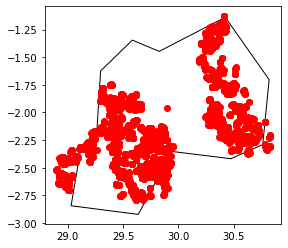

In [44]:
ax = world[world.iso_a3=="RWA"].plot(
    color='white', edgecolor='black')#plot the location of households in Rwanda

# We can now plot our ``Geo_rw DataFrame``.
gdf_rw.plot(ax=ax, color='red')

plt.show()

### Rwanda only has one kind of food security, which cannot be used. Because we need to see the changes via differnt kind of food security.

### Tanzania

In [45]:
gdf_tz = geopandas.GeoDataFrame( #set a new dataframe for plotting data of Tanzania
    food_safety_tz, geometry=geopandas.points_from_xy(food_safety_tz.gps_lon, food_safety_tz.gps_lat))

In [47]:
gdf_tz

,id_unique,id_rhomis_dataset,id_country,gps_lat,gps_lon,gps_alt,country,sublocation,hfias_status,geometry
28766,59b6a1a09c5ea3b4278771bf825183d5,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,food_secure,POINT (38.44000 -5.18000)
28767,e615530ef1dc3c32cdfcab261c2bb49a,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,food_secure,POINT (38.44000 -5.18000)
28768,95833631f148fce365b77cc55ded6fde,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,food_secure,POINT (38.44000 -5.18000)
28769,525162fd746a6f680dcc869f11a9f5d9,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,food_secure,POINT (38.44000 -5.18000)
28770,1b565a0ff731980dea41897852dd3a3f,f5491cfc16210db8a0617f34b309c584,tz,-5.18,38.44,NaN,tanzania,NaN,severely_fi,POINT (38.44000 -5.18000)
...,...,...,...,...,...,...,...,...,...,...
31641,beaea72d2b4074cff739d435f30f3002,fc94ed21eeea955cde1cc0375b8cce27,tz,-10.86,39.59,262.39,tanzania,NaN,food_secure,POINT (39.59000 -10.86000)
31642,f725426fdcc21bf54e319880e021c022,fc94ed21eeea955cde1cc0375b8cce27,tz,-10.81,39.66,270.92,tanzania,NaN,severely_fi,POINT (39.66000 -10.81000)
31643,53de2bb81da1c2547bc08cfa27f16494,fc94ed21eeea955cde1cc0375b8cce27,tz,-10.81,39.66,275.28,tanzania,NaN,severely_fi,POINT (39.66000 -10.81000)
31644,1800b7494547f298088e0a552d0cab95,fc94ed21eeea955cde1cc0375b8cce27,tz,-10.75,39.77,231.78,tanzania,NaN,severely_fi,POINT (39.77000 -10.75000)


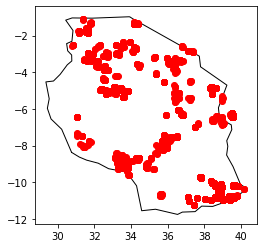

In [48]:
ax = world[world.iso_a3=="TZA"].plot(
    color='white', edgecolor='black')#plot the location of households in Tanzania

# We can now plot our ``Geo_tz DataFrame``.
gdf_tz.plot(ax=ax, color='red')

plt.show()

###  The data points are shown on the different parts of map, and has different kind of food security, which can be used.

In [23]:
# food_safety_bf.to_csv('food_safety_bf.csv')
# food_safety_tz.to_csv('food_safety_tz.csv')
# food_safety_rw.to_csv('food_safety_rw.csv')
# food_safety_et.to_csv('food_safety_et.csv') #if want to see the data in csv file